In [1]:
# Import the primary data analysis libraries
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
import math
from scipy import signal
import pandas as pd
import os
import latexify
log_path = 'data/'

In [2]:
#helper function
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))



In [3]:
#print all available files
dirs = ['Hip/', 'Pocket/Orientation1/', 'Hand/']
for folder in dirs:
    for filename in os.listdir(log_path+folder):
        print(log_path+folder+filename)

data/Hip/10Steps_L2_20210825_184100.csv
data/Hip/15Steps_L2_20210825_184003.csv
data/Hip/20Steps_L2_20210825_184146.csv
data/Pocket/Orientation1/10Steps_20210825_183129.csv
data/Pocket/Orientation1/12Steps_20210825_183207.csv
data/Pocket/Orientation1/15Steps_20210821_132340.csv
data/Pocket/Orientation1/15Steps_20210821_132752.csv
data/Pocket/Orientation1/15Steps_20210821_132926.csv
data/Pocket/Orientation1/20Steps_20210825_182900.csv
data/Pocket/Orientation1/25Steps_20210825_183002.csv
data/Pocket/Orientation1/30Steps_20210825_182748.csv
data/Hand/10Steps_L3_20210825_184434.csv
data/Hand/21Steps_L3_20210825_184240.csv
data/Hand/25Steps_L3_20210825_184329.csv


## Experiment 4
Downsample to various different frequencies and report the error.

### Modified Peak Detection Algorithm
Note that the `threshold` was empirically chosen for different position of the body. The low frequency noise gets eliminated by taking the average of 10 data points of the signal

In [8]:
mpe=0;

#lists to generate bar plot
positions = []
mperrors_1 = []
mperrors_2 = []
mperrors_3 = []

for step in [1,2,3]:
    #use optimal values detected above
    for folder in dirs:
        difference = 0 #this variable will be used to track the Mean Absolute Error.
        mpe = 0 #this variable will track the mean percentage error
        print("\nLocation = {}".format(folder[:-1]))
        positions.append(folder[:-1])
        for filename in os.listdir(log_path+folder):
            #fig, ax  = plt.subplots(2,1)
            #each file contains the step count in the first two characters
            groundTruth = int(filename[:2])
            df1 = pd.read_csv(log_path+folder+filename).dropna()
            df1['Timestamp'] = pd.to_datetime(df1.Timestamp, format='%d-%b-%Y %H:%M:%S.%f')
            df1.index = df1.Timestamp;
            acc1_mag = np.sqrt(df1.X**2+df1.Y**2+df1.Z)
            
            #resample the magnitude of acceleration
            acc1_mag = acc1_mag[::step];

            
            # Run algo with settings from above
            if folder[:-1] == 'Pocket/Orientation1':
                result = thresholding_algo(acc1_mag, lag=10, threshold=6, influence=0.8)
            elif folder[:-1] == 'Hip':
                result = thresholding_algo(acc1_mag, lag=10, threshold=6, influence=0.4)
            elif folder[:-1] == 'Hand':
                result = thresholding_algo(acc1_mag, lag=10, threshold=5, influence=0.4)


            
            #ax[0].plot(np.arange(1, len(acc1_mag)+1), acc1_mag)
            #ax[0].set_xlabel("Data Points")
            #ax[0].set_ylabel("Magnitude of\nacceleration")
            #ax[0].plot(np.arange(1, len(acc1_mag)+1),result["avgFilter"], color="cyan", lw=2)
            #ax[0].plot(np.arange(1, len(acc1_mag)+1),result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)
            #ax[0].plot(np.arange(1, len(acc1_mag)+1),result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)
            #ax[1].plot(np.arange(1, len(acc1_mag)+1), result["signals"], color="red", lw=2)
            #ax[1].set_xlabel("Data Points")
            #ax[1].set_ylabel("Magnitude of\nacceleration")
            #print("\nSteps Detected = {}".format(len([i for i in result["signals"] if i == 1.0])))
            #print("Ground Truth = {}".format(groundTruth))
            mpe+=((groundTruth-len([i for i in result["signals"] if i == 1.0]))/groundTruth)

        mpe = abs((mpe/len((os.listdir(log_path)))*100));
        print("Mean Percentage Error With Step {} is  {:.2f}%".format(step,mpe))
        if step == 1:
            mperrors_1.append(mpe)
        elif step == 2:
            mperrors_2.append(mpe)
        elif step == 3:
            mperrors_3.append(mpe)


Location = Hip
Mean Percentage Error With Step 1 is  5.00%

Location = Pocket/Orientation1
Mean Percentage Error With Step 1 is  1.89%

Location = Hand
Mean Percentage Error With Step 1 is  2.67%

Location = Hip
Mean Percentage Error With Step 2 is  30.56%

Location = Pocket/Orientation1
Mean Percentage Error With Step 2 is  141.33%

Location = Hand
Mean Percentage Error With Step 2 is  77.65%

Location = Hip
Mean Percentage Error With Step 3 is  59.44%

Location = Pocket/Orientation1
Mean Percentage Error With Step 3 is  156.11%

Location = Hand
Mean Percentage Error With Step 3 is  71.40%


### Report Error

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


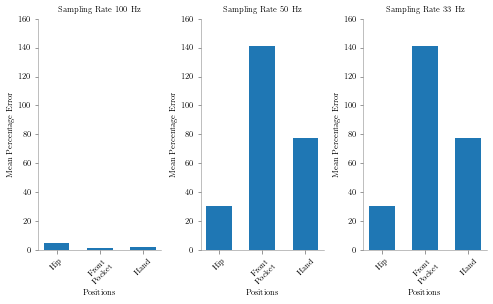

In [22]:
latexify.latexify(columns=2)
fig, ax = plt.subplots(1,3);
ax[0].bar(positions[:3], mperrors_1, width = 0.6)
ax[0].set_xlabel("Positions")
ax[0].set_ylabel("Mean Percentage Error")
ax[0].set_ylim([0,160])
ax[0].set_xticklabels(['Hip', 'Front\nPocket', 'Hand'], rotation = 45)
ax[0].set_title('Sampling Rate 100 Hz')
latexify.format_axes(ax[0])

ax[1].bar(positions[:3], mperrors_2, width = 0.6)
ax[1].set_xlabel("Positions")
ax[1].set_ylabel("Mean Percentage Error")
ax[1].set_ylim([0,160])
ax[1].set_xticklabels(['Hip', 'Front\nPocket', 'Hand'], rotation = 45)
ax[1].set_title('Sampling Rate 50 Hz')
latexify.format_axes(ax[1])

ax[2].bar(positions[:3], mperrors_2, width = 0.6)
ax[2].set_xlabel("Positions")
ax[2].set_ylabel("Mean Percentage Error")
ax[2].set_ylim([0,160])
ax[2].set_xticklabels(['Hip', 'Front\nPocket', 'Hand'], rotation = 45)
ax[2].set_title('Sampling Rate 33 Hz')
latexify.format_axes(ax[2])

fig.tight_layout()
plt.savefig("sampling-rate-result.pdf", bbox_inches='tight')